# ObsID : 0945040133, SRCNUM : 11, Instru : EPN
Not on Simbad

## ESASky

https://sky.esa.int/esasky/?target=54.38275000000001%20-28.289333333333335&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033731.8-281722
- IAU name : 4XMM J033731.8-281721
- RA : 03h 37m 31.839s
- DEC : -28° 17' 22.01"

In [2]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [3]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [4]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945040133_SRCNUM11_EPN_spectrum_grp.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.409e-03 +/- 9.121e-04 (100.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-3
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.011e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945040133_SRCNUM11_EPN_background_spectrum.fits
  Background Exposure Time: 1.011e+04 sec
 Using Response (RMF) File            ObsID0945040133_SRCNUM11_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945040133_SRCNUM11_EPN.arf



In [5]:
n_cts = 8.409e-03*1.011e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 85.01499

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [7]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



(-0.5, 857.5, 661.5, -0.5)

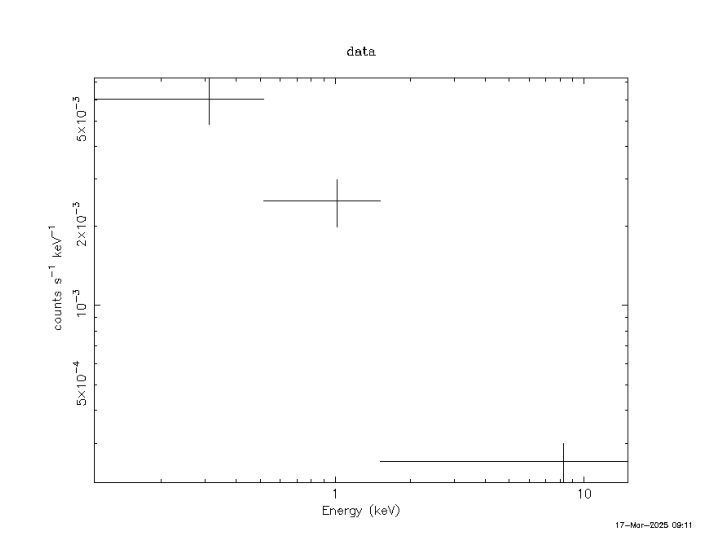

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [9]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.
Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Bremsstrahlung model

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Apec model

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit

### Powerlaw model

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________

Ill-formed Fit problem - number of variable parameters exceeds number of bins


***Warning: Ill-formed Fit problem - number of variable parameters exceeds number of bins


Exception: Error executing command: fit